
# Collision of Two Identical Spheres with Normal Restitution and Sliding (Coulomb) Friction at Contact

This notebook documents a **minimal impulsive collision model** for two identical spheres colliding at low speed.

## Coordinate system

Coordinate system
- $Ox$ — along the initial velocity of body 1.
- $Oy$ — in the horizontal plane, perpendicular to $Ox$
- $Oz$ - vertical, perpendicular to the plane of motion $(x, y)$

Positive angles direction: rotation from $x$ to $y$, counterclockwise.

## Model assumptions
- Two identical spheres: mass $m$, radius $R$, moment of inertia $I=\frac{2}{5}mR^2$ (uniform solid sphere).
- Sphere **2** is initially at rest: $\vec v_{20}=0$, $\vec\omega_{20}=0$.
- Sphere **1** has initial translational velocity $\vec v_{10}=(v_0,0,0)$.
- Sphere **1** has initial rolling  $\vec \omega_{10}=(0, \frac{v_0}{R},0)$.
- Impact occurs when the line of centers makes angle $\alpha$ with the $x$-axis.
- Geometry of impact:
  - vector $\vec n$ is directed from the center of sphere 1 to the center of sphere 2.
  - vector $\vec t$ is perpendicular to $\vec n$ in the plane of motion $(x,y)$
- **Impact** is described by impulse $\vec J$
$$
\vec J = \int_\textrm{contact time} \vec F_{\textrm{contact}} dt,
$$
We decompose the impulse transmitted during the short collision as
$$
\vec J = J_n\,\vec n + J_t\,\vec t.
$$
We adopt the convention: sphere 2 receives $+\vec J$ and sphere 1 receives $-\vec J$.
- **Normal restitution** (not necessarily perfectly elastic) with coefficient $e\in[0,1]$. Ideal elastic case $e=1$, ideal inelastic $e=0$.
- **Sliding friction at contact (Coulomb, kinetic)**: the tangential impulse magnitude satisfies $$|J_t|=\mu J_n,$$ and direction opposes the initial tangential slip.
- In this notebook we use a **2D in-plane tangential direction** $\vec t$ (horizontal). This is the standard billiard-type approximation for planar scattering.





## Geometry and unit vectors
At the instant of impact, define the unit normal along the line of centers:
$$
\vec n = (\cos\alpha,\ \sin\alpha,\ 0).
$$
Choose an in-plane tangential unit vector orthogonal to $\vec n$:
$$
\vec t = (-\sin\alpha,\ \cos\alpha,\ 0),\qquad \vec t\cdot\vec n=0.
$$

## Contact impulse




## Linear impulse–momentum (translation)
Impulse–velocity relations:
$$
m(\vec v_1-\vec v_{10}) = -\vec J,\qquad m(\vec v_2-\vec v_{20}) = +\vec J.
$$
With $\vec v_{20}=0$:
$$
\boxed{\ \vec v_1 = \vec v_{10} - \frac{\vec J}{m},\qquad \vec v_2 = \frac{\vec J}{m}\ }.
$$
Total linear momentum is conserved automatically:
$$
m\vec v_{10} + m\vec v_{20} = m\vec v_1 + m\vec v_2.
$$



## Normal restitution law and the normal impulse $J_n$
The relative normal velocity (of the centers) along $\vec n$ changes according to
$$
(\vec v_1-\vec v_2)\cdot\vec n = -e\,(\vec v_{10}-\vec v_{20})\cdot\vec n.
$$
Using $\vec v_{20}=0$ and $\vec v_1-\vec v_2 = \vec v_{10} - \frac{2\vec J}{m}$, and noting $\vec J\cdot\vec n=J_n$, we obtain:
$$
\vec v_{10}\cdot\vec n - \frac{2J_n}{m} = -e(\vec v_{10}\cdot\vec n).
$$
Hence
$$
\boxed{\ J_n = \frac{m}{2}(1+e)\,(\vec v_{10}\cdot\vec n)\ }.
$$
With $\vec v_{10}=(v_0,0,0)$ and $\vec n=(\cos\alpha,\sin\alpha,0)$:
$$
\boxed{\ J_n = \frac{m}{2}(1+e)\,v_0\cos\alpha\ }.
$$



## Coulomb sliding (kinetic) friction: tangential impulse $J_t$
In the **sliding** regime the tangential impulse magnitude satisfies
$$
|J_t| = \mu J_n.
$$
We choose $\vec t$ to align with the **initial in-plane tangential slip direction**, so the friction impulse opposes it:
$$
\boxed{\ J_t = -\mu J_n\ }.
$$

Thus
$$
\boxed{\ \vec J = J_n(\vec n - \mu \vec t)\ }.
$$



## Explicit post-impact velocities in $(x,y)$
Define
$$
k \equiv \frac{J_n}{m} = \frac{1}{2}(1+e)\,v_0\cos\alpha.
$$

Then
$$
\boxed{\ \vec v_2 = k(\vec n - \mu\vec t),\qquad \vec v_1 = (v_0,0,0) - \vec v_2\ }.
$$

With $c=\cos\alpha$, $s=\sin\alpha$, $\vec n=(c,s)$, $\vec t=(s,-c)$:
$$
\boxed{
\begin{aligned}
v_{2x} &= k(c-\mu s), &\quad v_{2y} &= k(s+\mu c),\\
v_{1x} &= v_0 - v_{2x}, &\quad v_{1y} &= -v_{2y}.
\end{aligned}
}
$$

## Scattering angles
Angles with respect to the \(+x\) axis:
$$
\theta_1 = \operatorname{atan2}(v_{1y},v_{1x}),\qquad
\theta_2 = \operatorname{atan2}(v_{2y},v_{2x}).
$$
The **separation angle** between trajectories is
$$
\Phi = \theta_2-\theta_1.
$$



## Spin update
If  include tangential impulse about the sphere centers, the spin changes as
$$
I(\vec\omega_1-\vec\omega_{10}) = R\,\vec n\times(J_t\vec t),\qquad
I(\vec\omega_2-\vec\omega_{20}) = R\,\vec n\times(J_t\vec t).
$$

For identical uniform spheres $I=\frac{2}{5}mR^2$ this gives an out-of-plane spin component proportional to $J_t$.

$$
\Delta \vec \omega_1 = \Delta \vec \omega_2 = \frac{R}{I} J_t (\vec n \times \vec t) = - \frac{R}{I} J_t \vec z
$$
Hence
$$
\omega_1 = \omega_{10} + \Delta \omega_1 = (0, \frac{v_0}{R}, -\frac{R}{I} J_t)
$$
and
$$
\omega_2 =  \Delta \omega_2 = (0, 0, -\frac{R}{I} J_t)
$$
After collision second spehre starts to move slipping without rolling, having only spin in z-direction. Then due to friction between surface and sphere  starts rolling.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def scattering_angle(alpha_deg, mu=0.15, e=0.95, v0=1.0):
    """Return (theta1, theta2, Phi) in degrees for given alpha (degrees)."""
    a = np.deg2rad(alpha_deg)
    c, s = np.cos(a), np.sin(a)
    k = 0.5*(1+e)*v0*c
    v2x = k*(c - mu*s)
    v2y = k*(s + mu*c)
    v1x = v0 - v2x
    v1y = -v2y
    th1 = np.arctan2(v1y, v1x)
    th2 = np.arctan2(v2y, v2x)
    d = th2 - th1
    d = (d + np.pi) % (2*np.pi) - np.pi   # wrap to [-pi, pi]
    Phi = abs(d)
    return np.rad2deg(th1), np.rad2deg(th2), np.rad2deg(Phi)

# quick sanity checks
for a in [0, 30, 45, 60, 90]:
    th1, th2, Phi = scattering_angle(a, mu=0.15, e=0.95)
    print(f"alpha={a:>2}°: theta1={th1:>7.3f}°, theta2={th2:>7.3f}°, Phi={Phi:>7.3f}°")


alpha= 0°: theta1=-80.300°, theta2=  8.531°, Phi= 88.830°
alpha=30°: theta1=-58.021°, theta2= 38.531°, Phi= 96.552°
alpha=45°: theta1=-43.751°, theta2= 53.531°, Phi= 97.281°
alpha=60°: theta1=-29.237°, theta2= 68.531°, Phi= 97.768°
alpha=90°: theta1= -0.000°, theta2= 98.531°, Phi= 98.531°


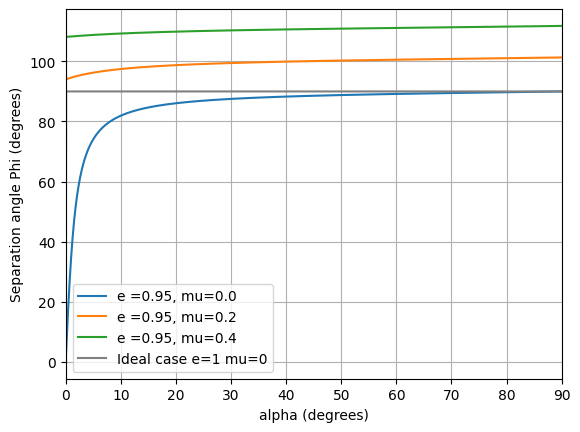

In [ ]:

# Plot Phi(alpha) for mu=0.15 and two restitution values e=1 and e=0.95
mu = 0.1
v0 = 1.0
alphas_deg = np.linspace(0, 90, 1000)
alphas = np.deg2rad(alphas_deg)
c = np.cos(alphas)
s = np.sin(alphas)

def Phi_curve(mu, e):
    k = 0.5*(1+e)*v0*c
    v2x = k*(c - mu*s)
    v2y = k*(s + mu*c)
    v1x = v0 - v2x
    v1y = -v2y
    th1 = np.arctan2(v1y, v1x)
    th2 = np.arctan2(v2y, v2x)
    d = th2 - th1
    d = (d + np.pi) % (2*np.pi) - np.pi
    return np.rad2deg(np.abs(d))

plt.figure()

e = 0.95
for mu in [0., 0.2,  0.4]:
  Phi = Phi_curve(mu, e)
  plt.plot(alphas_deg, Phi, label=f'{e =}, {mu=}')


Phi = Phi_curve(0, 1)
mu = 0; e= 1
plt.plot(alphas_deg, Phi, color='gray', label=f'Ideal case {e=} {mu=}')

plt.xlabel('alpha (degrees)')
plt.ylabel('Separation angle Phi (degrees)')
plt.grid(True)
plt.legend()
#plt.ylim(0, 130)
plt.xlim(0, 90)
plt.legend()
plt.show()
